<a href="https://colab.research.google.com/github/RecursiveOuroboros/DS-Unit-2-Sprint-4-Practicing-Understanding/blob/master/JM_EDA_Kaggle_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

# Settings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
%matplotlib inline

# Display options
pd.options.display.max_columns = 50
pd.options.display.max_rows = 10

In [0]:
# Reading csv files
test_data =  pd.read_csv('https://raw.githubusercontent.com/RecursiveOuroboros/Water-Pumps-Kaggle/master/test_features.csv')
train_data = pd.read_csv ('https://raw.githubusercontent.com/RecursiveOuroboros/Water-Pumps-Kaggle/master/train_features.csv')
train_labels = pd.read_csv ('https://raw.githubusercontent.com/RecursiveOuroboros/Water-Pumps-Kaggle/master/train_labels.csv')

In [4]:
# Taking a first look
test_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [5]:
train_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [7]:
# train and test have the same numer of columns?
len(train_data.columns) == len(test_data.columns)

True

In [8]:
# merging train and test before cleaning and transforming the data
all_data = train_data.append(test_data)

# the merge is correct?
len(all_data) == (len(train_data)+len(test_data))

True

In [9]:
# looking at label distribution
train_labels.groupby(['status_group']).size()

status_group
functional                 32259
functional needs repair     4317
non functional             22824
dtype: int64

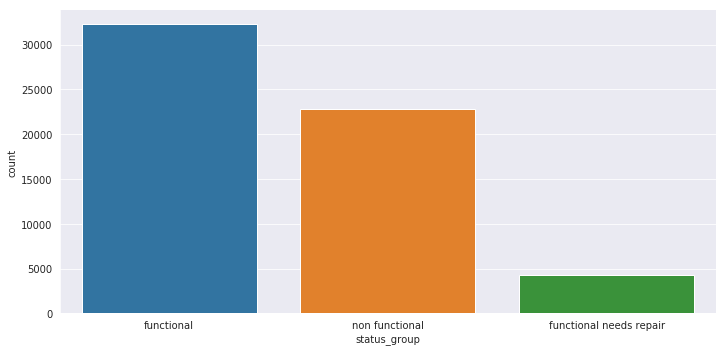

In [10]:
sns.factorplot('status_group', data=train_labels, aspect=2, kind='count');

In [0]:
# Very small amount of 'functional needs repair'. It will probably be the hardest to predict

## Data Cleaning

In [12]:
# Looking at the columns
list(all_data)

['id',
 'amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [13]:
# counting NAs per column
all_data.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                   4418
gps_height                  0
                         ... 
source                      0
source_type                 0
source_class                0
waterpoint_type             0
waterpoint_type_group       0
Length: 40, dtype: int64

In [0]:
# Few variables have NAs, let's go through each of the variables to spot some other possible problems

In [15]:
# --- Subvillage ---

# top 20 subvillages
all_data.groupby(['subvillage'])['id'].count().sort_values(ascending=False)[:10]

subvillage
Shuleni       642
Majengo       627
Madukani      624
Kati          464
Mtakuja       322
Sokoni        294
M             238
Muungano      213
Mbuyuni       210
Songambele    193
Name: id, dtype: int64

In [0]:
# Let's first impute the NAs to Unknown
all_data.subvillage.fillna(value='other', inplace=True)

# And all the values which are clear errors (1, A, M, N, ...)
all_data.loc[all_data.subvillage.str.len() == 1, 'subvillage'] = 'other'

In [17]:
# --- Amount tsh: amount of water in the basin ---

# Some significant values:
print('max:',all_data.amount_tsh.max())
print('min:',all_data.amount_tsh.min())
print('mean:',all_data.amount_tsh.mean())
print('median:',all_data.amount_tsh.median())

max: 350000.0
min: 0.0
mean: 318.9292490306136
median: 0.0


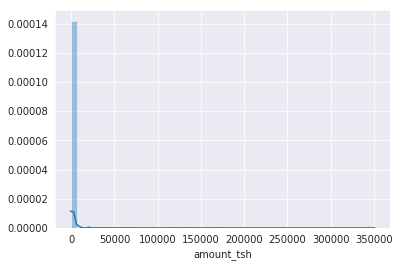

In [18]:
# Distribution
sns.distplot(all_data.amount_tsh)

In [0]:
# Too many zeros, let's drop the column
all_data = all_data.drop('amount_tsh', axis=1)

In [20]:
# --- Date recorded: date in which the row was inserted ---

# First look
all_data.date_recorded[:10]

0    2011-03-14
1    2013-03-06
2    2013-02-25
3    2013-01-28
4    2011-07-13
5    2011-03-13
6    2012-10-01
7    2012-10-09
8    2012-11-03
9    2011-08-03
Name: date_recorded, dtype: object

In [0]:
# Let's split it to year and month
all_data['year_recorded'] = all_data.date_recorded.str.slice(0,4)
all_data['month_recorded'] = all_data.date_recorded.str.slice(5,7)

# Convert them to integer
all_data.year_recorded = all_data.year_recorded.astype('float', errors='ignore')
all_data.month_recorded = all_data.month_recorded.astype('float', errors='ignore')

# And drop the date column
all_data = all_data.drop('date_recorded', axis=1)

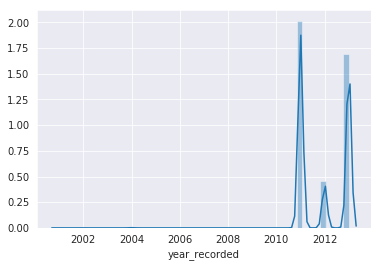

In [22]:
# Distribution
sns.distplot(all_data.year_recorded);

In [23]:
all_data.groupby(['year_recorded'])['id'].count()

year_recorded
2001.0        1
2002.0        1
2004.0       41
2011.0    35672
2012.0     8034
2013.0    30009
Name: id, dtype: int64

In [0]:
# I suppose 2001, 2002 and 2004 are errors
all_data.loc[all_data.year_recorded == 2001.0, 'year_recorded'] = 2011
all_data.loc[all_data.year_recorded == 2002.0, 'year_recorded'] = 2012
all_data.loc[all_data.year_recorded == 2004.0, 'year_recorded'] = 2014

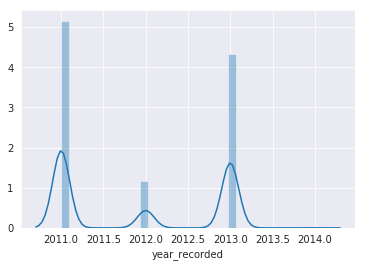

In [25]:
# New distribution
sns.distplot(all_data.year_recorded)

In [26]:
# --- Funder ---
all_data.groupby(['funder']).size().sort_values(ascending=False)[:10]

funder
Government Of Tanzania    11201
Danida                     3888
Hesawa                     2775
Rwssp                      1693
World Bank                 1684
Kkkt                       1617
World Vision               1552
Unicef                     1324
Tasaf                      1127
Dhv                        1065
dtype: int64

In [0]:
# Let's impute them as other for now
all_data.funder.fillna('other', inplace=True)

# And all the values which are clear errors (1, A, M, N, ...)
all_data.loc[all_data.funder.str.len() == 1, 'funder'] = 'other'

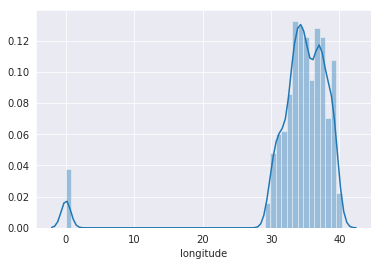

In [28]:
# --- Longitude ---
sns.distplot(all_data.longitude)

In [29]:
# Some data has longitude equal zero, which is not possible

# Let's set the 0 values to NA
all_data.loc[all_data.longitude == 0, 'longitude'] = np.nan
all_data.longitude.isnull().sum()

2248

In [30]:
# And let's impute the missing coordinates with the average longitude of the subvillage they belong
all_data.longitude.fillna(all_data.groupby(['subvillage'])['longitude'].transform('mean'), inplace=True)
all_data.longitude.isnull().sum()

1398

In [31]:
# Still some NAs, let's impute them based on ward (the smallest division after subvillage)
all_data.longitude.fillna(all_data.groupby(['ward'])['longitude'].transform('mean'), inplace=True)
all_data.longitude.isnull().sum()

37

In [32]:
# Still some, keep on imputing by geographical divisions, going wider and wider
all_data.longitude.fillna(all_data.groupby(['lga'])['longitude'].transform('mean'), inplace=True)
all_data.longitude.isnull().sum()

0

In [0]:
# Let's round longitude to 2 decimals
all_data.longitude = all_data.longitude.round(2)

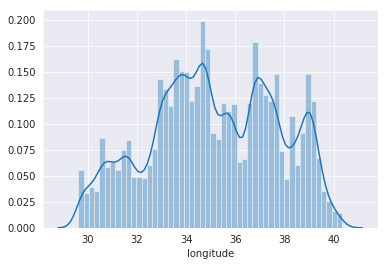

In [34]:
sns.distplot(all_data.longitude) # Much better now

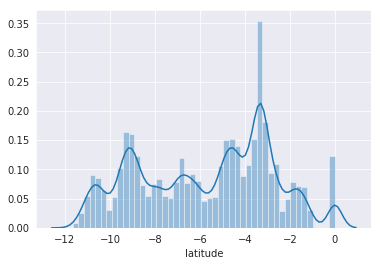

In [35]:
# --- Latitude ---

# Let's round latitude to 2 decimals
all_data.latitude = all_data.latitude.round(2)

sns.distplot(all_data.latitude)

In [36]:
# Again a few 0. Tanzania is all below the equator, therefore 0 must be wrong
# Let's set the 0 values to NA

all_data.loc[all_data.latitude == 0, 'latitude'] = np.nan
all_data.latitude.isnull().sum()

2248

In [37]:
# And let's impute the missing coordinates with the average longitude of the subvillage they belong
all_data.latitude.fillna(all_data.groupby(['subvillage'])['latitude'].transform('mean'), inplace=True)
all_data.latitude.isnull().sum()

1398

In [38]:
# Still some NAs, let's impute them based on ward (the smallest division after subvillage)
all_data.latitude.fillna(all_data.groupby(['ward'])['latitude'].transform('mean'), inplace=True)
all_data.latitude.isnull().sum()

37

In [39]:
# Still some, keep on imputing by geographical divisions, going wider and wider
all_data.latitude.fillna(all_data.groupby(['lga'])['latitude'].transform('mean'), inplace=True)
all_data.latitude.isnull().sum()

0

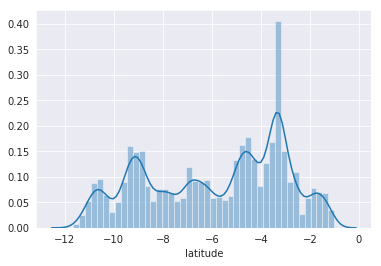

In [40]:

sns.distplot(all_data.latitude) # Much better now

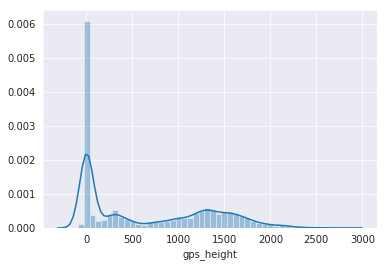

In [41]:
# --- GPS Height ---
sns.distplot(all_data.gps_height)

In [42]:
# Too many zeros, let's do as for latitude and longitude
all_data.loc[all_data.gps_height == 0, 'gps_height'] = np.nan
all_data.gps_height.isnull().sum()

25416

In [43]:
# by subvillage
all_data.gps_height.fillna(all_data.groupby(['subvillage'])['gps_height'].transform('mean'), inplace=True)
all_data.gps_height.isnull().sum()

18926

In [44]:
# by ward
all_data.gps_height.fillna(all_data.groupby(['ward'])['gps_height'].transform('mean'), inplace=True)
all_data.gps_height.isnull().sum()

2200

In [45]:
# by lga
all_data.gps_height.fillna(all_data.groupby(['lga'])['gps_height'].transform('mean'), inplace=True)
all_data.gps_height.isnull().sum()

106

In [46]:
# by region
all_data.gps_height.fillna(all_data.groupby(['region_code'])['gps_height'].transform('mean'), inplace=True)
all_data.gps_height.isnull().sum()

0

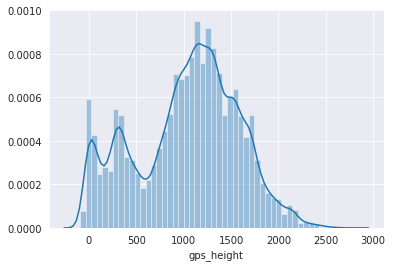

In [47]:
# Good now
sns.distplot(all_data.gps_height)

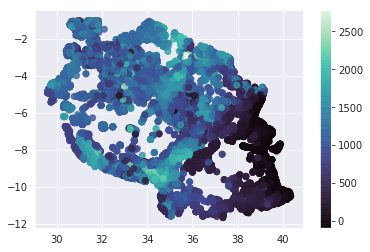

In [48]:
# Plot of gps coordinates colored by gps height. Seems correct
plt.scatter(all_data.longitude, all_data.latitude, alpha = .8, c = all_data.gps_height, cmap = 'mako')
cbar = plt.colorbar()

In [49]:
# --- Installer ---
all_data.groupby(['installer'])['id'].count().sort_values(ascending=False)[:10]

installer
DWE           21564
Government     2275
RWE            1494
Commu          1333
DANIDA         1304
KKKT           1117
Hesawa         1066
0               975
TCRS            882
CES             765
Name: id, dtype: int64

In [50]:
# Let's impute them as unknown for now
all_data.installer.fillna('other', inplace=True)

# And all the values which are clear errors (1, A, M, N, ...)
all_data.loc[all_data.installer.str.len() == 1, 'installer'] = 'other'

all_data.installer.isnull().sum()

0

In [51]:
# --- wpt_name ---
all_data.groupby(['wpt_name']).size().sort_values(ascending=False)[1:10]

wpt_name
Shuleni            2162
Zahanati           1022
Msikitini           646
Kanisani            388
Sokoni              327
Bombani             322
Ofisini             321
School              258
Shule Ya Msingi     245
dtype: int64

In [0]:
# Too many different, we can drop wpt_name
all_data = all_data.drop('wpt_name', axis=1)

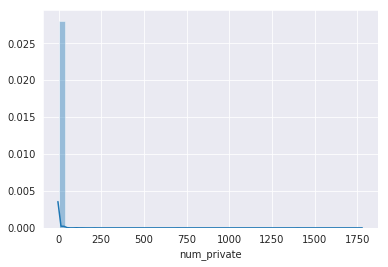

In [53]:
# --- Num private: no descrition of this ---
sns.distplot(all_data.num_private)

In [0]:
# Let's drop the feature
all_data = all_data.drop('num_private', axis=1)

In [55]:
# --- Basin: geographical basin ---
all_data.groupby(['basin']).size() # Everything good here

basin
Internal                    9484
Lake Nyasa                  6251
Lake Rukwa                  3054
Lake Tanganyika             8024
Lake Victoria              12783
Pangani                    11093
Rufiji                      9944
Ruvuma / Southern Coast     5580
Wami / Ruvu                 7545
dtype: int64

In [56]:
# --- Region ---
all_data.groupby(['region']).size().sort_values(ascending=False)[:10] # Everything good here

region
Iringa         6546
Shinyanga      6240
Mbeya          5687
Kilimanjaro    5490
Morogoro       5033
Kagera         4139
Arusha         4098
Mwanza         3866
Kigoma         3533
Pwani          3329
dtype: int64

In [57]:
# --- Region code ---
all_data.groupby(['region_code']).size().sort_values(ascending=False)[:10] # Everything good here

region_code
11    6555
17    6264
12    5688
3     5490
5     5074
18    4148
19    3810
2     3696
16    3533
10    3305
dtype: int64

In [58]:
all_data.groupby(['region','region_code']).size()[:10]

region         region_code
Arusha         2              3696
               24              402
Dar es Salaam  7              1003
Dodoma         1              2758
Iringa         11             6546
Kagera         18             4139
Kigoma         16             3533
Kilimanjaro    3              5490
Lindi          8               373
               18                9
dtype: int64

In [0]:
# region_code has more informations, let's drop region column
all_data = all_data.drop('region', axis=1)

In [60]:
# --- District code ---
all_data.groupby(['district_code']).size().sort_values(ascending=False)[:10] # Everything good here

district_code
1     15090
2     13872
3     12464
4     11151
5      5410
6      5091
7      4154
8      1269
30     1253
33     1060
dtype: int64

In [61]:
all_data.groupby(['region_code','district_code']).size()[:10]

region_code  district_code
1            0                  27
             1                1101
             3                 455
             4                 435
             5                 466
             6                 274
2            1                 226
             2                1454
             3                 143
             5                 240
dtype: int64

In [0]:
# district code repeats in different regions, let's drop it
all_data = all_data.drop('district_code', axis=1)

In [63]:
# --- Lga ---
all_data.groupby(['lga']).size().sort_values(ascending=False)[:10] 

lga
Njombe          3114
Moshi Rural     1566
Arusha Rural    1515
Bariadi         1482
Kilosa          1364
Kasulu          1322
Rungwe          1320
Mbozi           1283
Bagamoyo        1263
Meru            1242
dtype: int64

In [64]:
all_data.groupby(['region_code', 'lga']).size()[:10] # Everything good here

region_code  lga         
1            Bahi             274
             Chamwino         435
             Dodoma Urban     466
             Kondoa           638
             Kongwa           455
             Mpwapwa          490
2            Arusha Rural    1515
             Arusha Urban      82
             Longido          391
             Meru            1242
dtype: int64

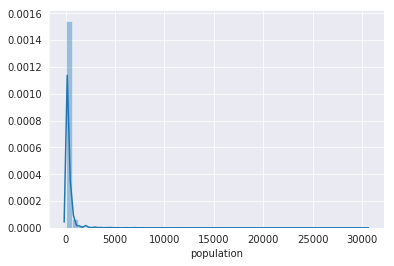

In [65]:
# --- Population ---
sns.distplot(all_data.population)

In [66]:
all_data.groupby(['population']).size().sort_values(ascending=False)[:10]
# Zero is not really possible, let's impute again by averages

population
0      26586
1       8726
200     2363
150     2322
250     2079
300     1837
50      1434
100     1415
500     1272
350     1250
dtype: int64

In [67]:
# Too many zeros, let's impute them by averages as for the geographical coordinates
all_data.loc[all_data.population == 0, 'population'] = np.nan
all_data.population.isnull().sum()

26586

In [68]:
# by subvillage
all_data.population.fillna(all_data.groupby(['subvillage'])['population'].transform('median'), inplace=True)
all_data.population.isnull().sum()

19168

In [69]:
# by ward
all_data.population.fillna(all_data.groupby(['ward'])['population'].transform('median'), inplace=True)
all_data.population.isnull().sum()

2340

In [70]:
# by lga
all_data.population.fillna(all_data.groupby(['lga'])['population'].transform('median'), inplace=True)
all_data.population.isnull().sum()

106

In [71]:
# by region_code
all_data.population.fillna(all_data.groupby(['region_code'])['population'].transform('median'), inplace=True)
all_data.population.isnull().sum()

0

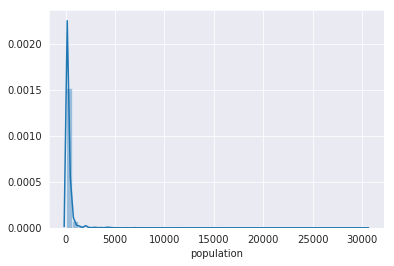

In [72]:
# distribution still vety skewed to the right => taking the log
sns.distplot(all_data.population)

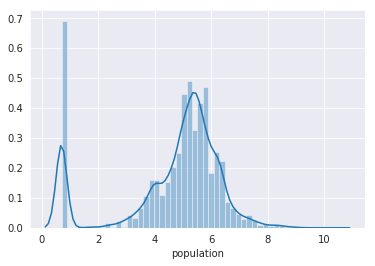

In [73]:
# Looks better now, still not the best
sns.distplot(np.log1p(all_data.population));

In [0]:
# Let's create a new column with the log of population
all_data['population_log'] = np.log1p(all_data.population)

# And drop population
all_data = all_data.drop('population', axis=1)

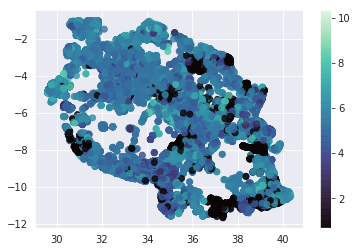

In [75]:
# Population density by geograohical coordinates
plt.scatter(all_data.longitude, all_data.latitude, alpha = .8, c = all_data.population_log, cmap = 'mako')
cbar = plt.colorbar()

In [76]:
# --- Public meeting ---
all_data.groupby(['public_meeting']).size()

public_meeting
False     6320
True     63319
dtype: int64

In [77]:
# Setting True to 1 and False to 0
all_data.loc[all_data.public_meeting == True, 'public_meeting'] = 1
all_data.loc[all_data.public_meeting == False, 'public_meeting'] = 0

# convert the column to integer
all_data.public_meeting = all_data.public_meeting.astype('int', errors='ignore')

# The ratio True:false is 10:1, we can safely impute all the NAs as True
all_data.public_meeting.fillna(1, inplace=True)
all_data.public_meeting.isnull().sum()

0

In [78]:
# --- Recorded by ---
all_data.recorded_by.unique() 

array(['GeoData Consultants Ltd'], dtype=object)

In [0]:
# There is only one institution recording, we can drop the column
all_data = all_data.drop('recorded_by', axis=1)

In [80]:
# --- Management ---

# let's impute them NAs as other for now
all_data.scheme_management.fillna('other', inplace=True)
all_data.scheme_management.isnull().sum()

0

In [81]:
# --- Scheme management ---
all_data.groupby(['scheme_management']).size().sort_values(ascending=False)[:10]

scheme_management
VWC                 45600
WUG                  6461
other                4816
Water authority      3961
WUA                  3537
Water Board          3432
Parastatal           2082
Company              1340
Private operator     1318
Other                 995
dtype: int64

In [82]:
# --- Scheme name ---
all_data.groupby(['scheme_name']).size().sort_values(ascending=False)[:10]

scheme_name
K                              816
None                           793
Borehole                       704
Chalinze wate                  501
M                              487
DANIDA                         483
Government                     395
Ngana water supplied scheme    333
wanging'ombe water supply s    322
Bagamoyo wate                  296
dtype: int64

In [83]:
all_data.groupby(['scheme_management','scheme_name']).size()[:10]

scheme_management  scheme_name              
Company            BFFS                           1
                   BSF water supplying            1
                   Bagamoyo Wate                 76
                   Bagamoyo wate                272
                   Borehole                       1
                   Borehole drilling project      1
                   Bulamba piped scheme           3
                   Burieni water supply           1
                   Doe water supply               4
                   EKTM 2 water  supply           1
dtype: int64

In [84]:
all_data.groupby(['scheme_management','management']).size()[:10]

scheme_management  management      
Company            company             847
                   other                 2
                   parastatal           30
                   private operator    287
                   vwc                 173
                   wug                   1
None               vwc                   1
Other              other               690
                   parastatal            1
                   private operator     78
dtype: int64

In [0]:
# Let's drop scheme_name, too many levels
all_data = all_data.drop('scheme_name', axis=1)

In [86]:
# --- permit ---
all_data.groupby(['permit'])['id'].count().sort_values(ascending=False)

permit
True     48294
False    21745
Name: id, dtype: int64

In [0]:
# we can drop the column
all_data = all_data.drop('permit', axis=1)

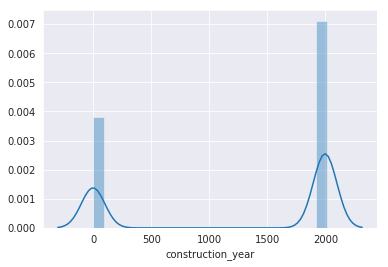

In [88]:
# --- Construction year ---
sns.distplot(all_data.construction_year) 

In [89]:
# A lot of zeros, let's go again with geographical medians
all_data.loc[all_data.construction_year == 0, 'construction_year'] = np.nan
all_data.construction_year.isnull().sum()

25733

In [90]:
# by subvillage
all_data.construction_year.fillna(all_data.groupby(['subvillage'])['construction_year'] \
                                  .transform('median'), inplace=True)

all_data.construction_year.isnull().sum()

18696

In [91]:
# by ward
all_data.construction_year.fillna(all_data.groupby(['ward'])['construction_year'] \
                                  .transform('median'), inplace=True)

all_data.construction_year.isnull().sum()

2183

In [92]:
# by lga
all_data.construction_year.fillna(all_data.groupby(['lga'])['construction_year'] \
                                  .transform('median'), inplace=True)

all_data.construction_year.isnull().sum()

106

In [93]:
# by region_code
all_data.construction_year.fillna(all_data.groupby(['region_code'])['construction_year'] \
                                  .transform('median'), inplace=True)

all_data.construction_year.isnull().sum()

0

In [0]:
# let's remove decimals from the year 
all_data.construction_year = all_data.construction_year.round(0)

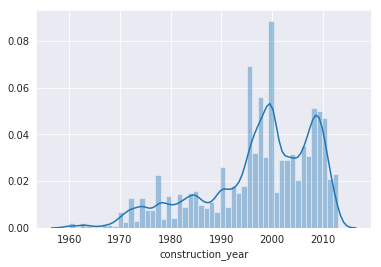

In [95]:
# Let's plot it again
sns.distplot(all_data.construction_year) # Good now

In [96]:
# --- Extraction type ---
all_data.groupby(['extraction_type','extraction_type_group','extraction_type_class']).size()[:10] # All good here

extraction_type  extraction_type_group  extraction_type_class
afridev          afridev                handpump                  2201
cemo             other motorpump        motorpump                  108
climax           other motorpump        motorpump                   40
gravity          gravity                gravity                  32948
india mark ii    india mark ii          handpump                  3020
india mark iii   india mark iii         handpump                   133
ksb              submersible            submersible               1785
mono             mono                   motorpump                 3606
nira/tanira      nira/tanira            handpump                 10161
other            other                  other                     8061
dtype: int64

In [0]:
# Let's keep only extraction_type_class
all_data = all_data.drop('extraction_type', axis=1)
all_data = all_data.drop('extraction_type_group', axis=1)

# And all the values which are clear errors (1, A, M, N, ...)
all_data.loc[all_data.scheme_management == 'None', 'scheme_management'] = 'other'

In [98]:
# --- Payment and payment type---
all_data.groupby(['payment','payment_type']).size() # All good here

payment                payment_type
never pay              never pay       31446
other                  other            1304
pay annually           annually         4539
pay monthly            monthly         10367
pay per bucket         per bucket      11217
pay when scheme fails  on failure       4830
unknown                unknown         10055
dtype: int64

In [0]:
# These two are redundant, let's drop payment
all_data = all_data.drop('payment', axis=1)

In [100]:
# --- Water quality ---
all_data.groupby(['water_quality','quality_group']).size() # All good here

water_quality       quality_group
coloured            colored            621
fluoride            fluoride           243
fluoride abandoned  fluoride            19
milky               milky              992
salty               salty             6072
salty abandoned     salty              419
soft                good             63055
unknown             unknown           2337
dtype: int64

In [0]:
# Water quality has more information, let's keep it and drop quality_group
all_data = all_data.drop('quality_group', axis=1)

In [102]:
# --- Quantity and quantity_group ---
all_data.groupby(['quantity','quantity_group'])['id'].size() # All good here

quantity      quantity_group
dry           dry                7764
enough        enough            41183
insufficient  insufficient      18808
seasonal      seasonal           5032
unknown       unknown             971
Name: id, dtype: int64

In [0]:
# The two columns are equal, let's drop quantity_group
all_data = all_data.drop('quantity_group', axis=1)

In [104]:
# --- Source ---
all_data.groupby(['source','source_type','source_class']).size() # All good here

source                source_type           source_class
dam                   dam                   surface           829
hand dtw              borehole              groundwater      1104
lake                  river/lake            surface           944
machine dbh           borehole              groundwater     13787
other                 other                 unknown           256
rainwater harvesting  rainwater harvesting  surface          2810
river                 river/lake            surface         11912
shallow well          shallow well          groundwater     21035
spring                spring                groundwater     20995
unknown               other                 unknown            86
dtype: int64

In [0]:
# Source and sopurce_type are equal similar, let's keep source as it has more informations
all_data = all_data.drop('source_type', axis=1)

In [106]:
# --- Water point type ---
all_data.groupby(['waterpoint_type','waterpoint_type_group']).size() # All good here

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough              149
communal standpipe           communal standpipe       35312
communal standpipe multiple  communal standpipe        7573
dam                          dam                          8
hand pump                    hand pump                21799
improved spring              improved spring            958
other                        other                     7959
dtype: int64

In [0]:
# The two columns are equal, let's drop waterpoint_type_group
all_data = all_data.drop('waterpoint_type_group', axis=1)

## Feature Engineering

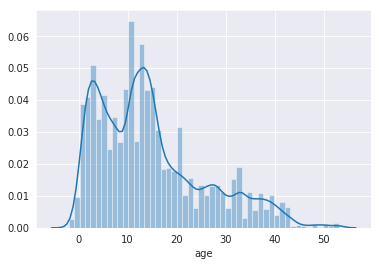

In [108]:
# --- Age column ---

# Let's compute the age when the status was recorded as year_recorded - year_built
all_data['age'] = all_data.year_recorded - all_data.construction_year

sns.distplot(all_data.age)

In [0]:
# Some ages are < 0 which is not possible, let's impute those to age 1
all_data.loc[all_data.age < 0, 'age'] = 1 

In [110]:
# --- season ---

# Jan and Feb short dry season
# long rains lasts during about March, April and May 
# long dry season lasts throughout June, July, August, September and October 
# During November and December there's another rainy season: the 'short rains'

all_data.loc[(all_data.month_recorded <= 2) & (all_data.month_recorded >= 1), 'season'] = 1
all_data.loc[(all_data.month_recorded <= 5) & (all_data.month_recorded >= 3), 'season'] = 2
all_data.loc[(all_data.month_recorded <= 10) & (all_data.month_recorded >= 6), 'season'] = 3
all_data.loc[(all_data.month_recorded <= 12) & (all_data.month_recorded >= 11), 'season'] = 4

# let's see the column
all_data.groupby(['season']).size()

season
1.0    23221
2.0    27584
3.0    20509
4.0     2444
dtype: int64

## Exploration

In [1]:
# Let's look at some of the variables with respect to status group

# Creating a df for plotting by merging train data and labels
plot_df = all_data[0:len(train_data)]
plot_df = plot_df.merge(train_labels, how='inner', on='id')

# Different regions affect the status?
plot = plot_df.groupby(['region_code', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40, cmap='mako');

NameError: ignored

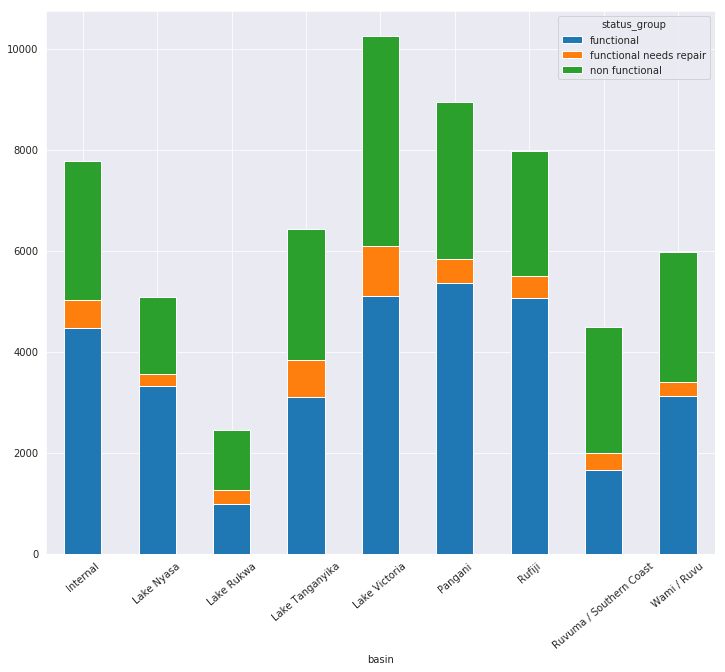

In [0]:
# Different basin affect the status?
plot = plot_df.groupby(['basin', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

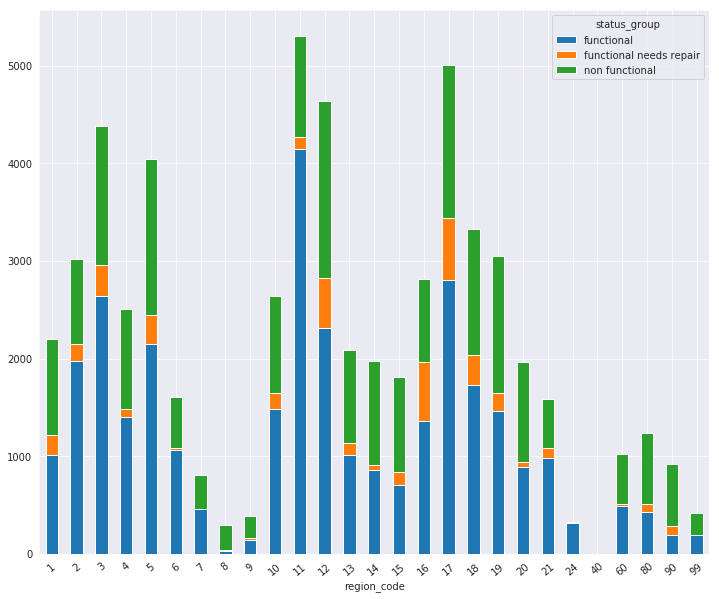

In [0]:
# Different region affect the status?
plot = plot_df.groupby(['region_code', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

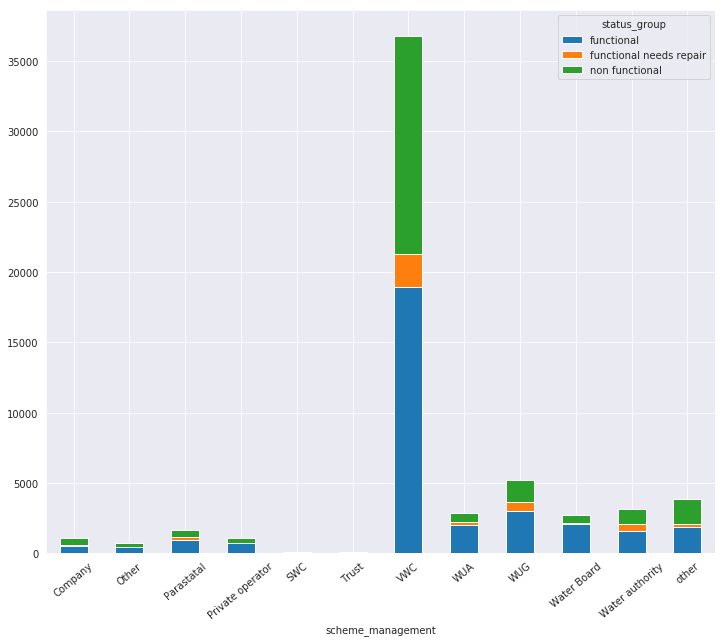

In [0]:
# Different scheme_management affect the status?
plot = plot_df.groupby(['scheme_management', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

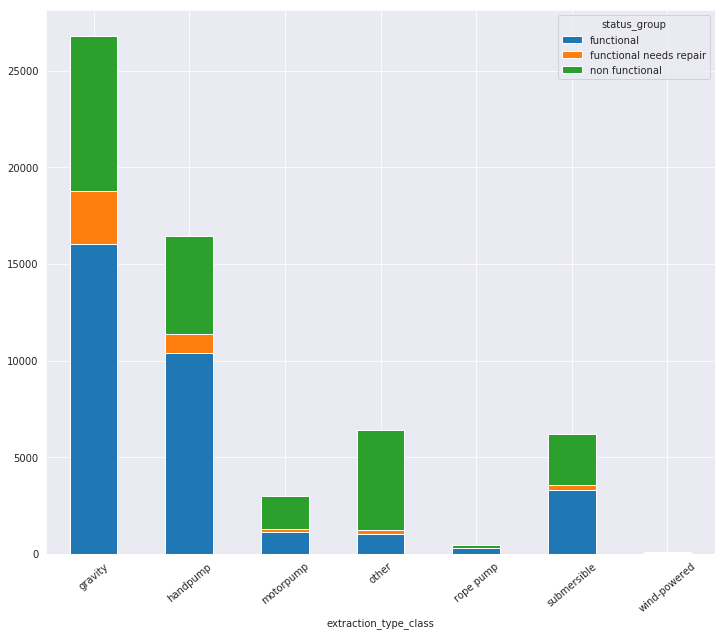

In [0]:
# Different extraction_type_class affect the status?
plot = plot_df.groupby(['extraction_type_class', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

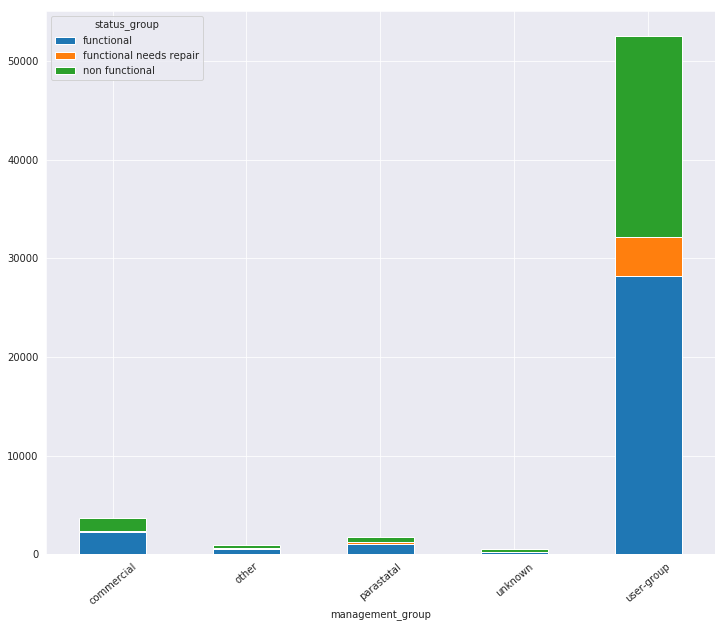

In [0]:
# Different management_group affect the status?
plot = plot_df.groupby(['management_group', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

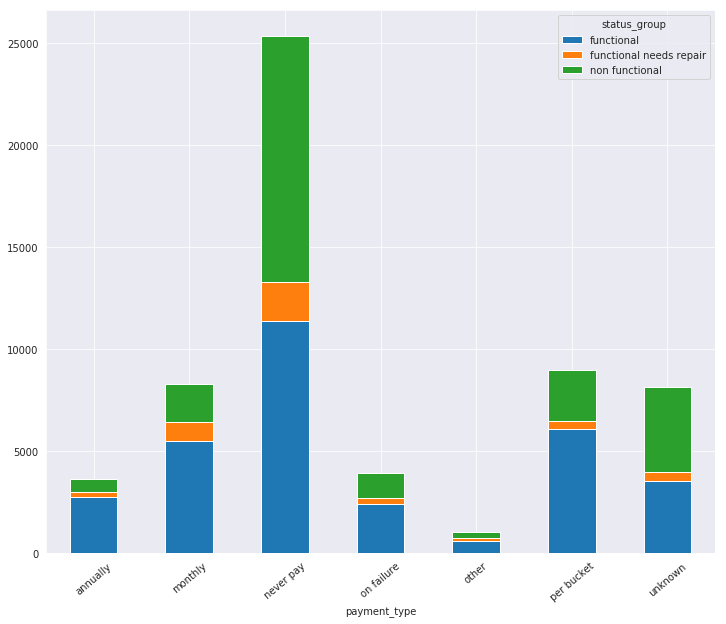

In [0]:
# Different extraction_type_class affect the status?
plot = plot_df.groupby(['payment_type', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

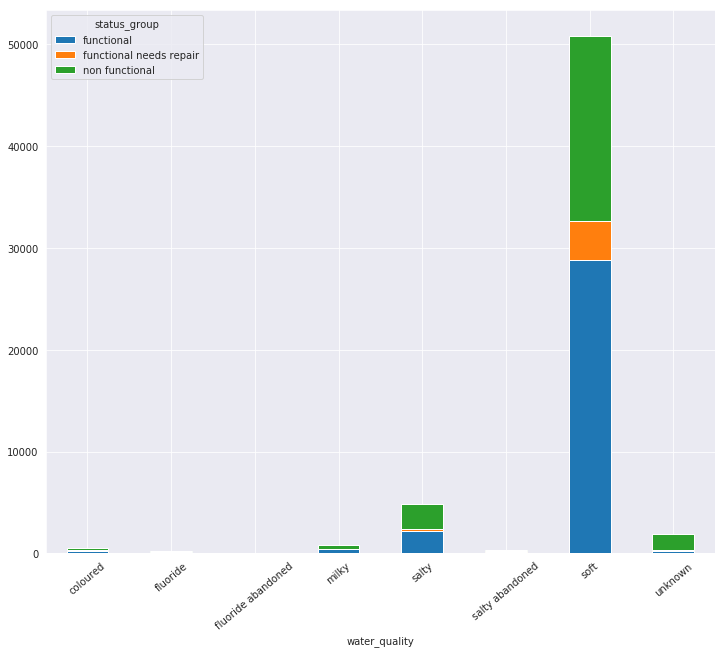

In [0]:
# Different water quality affect the status?
plot = plot_df.groupby(['water_quality', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

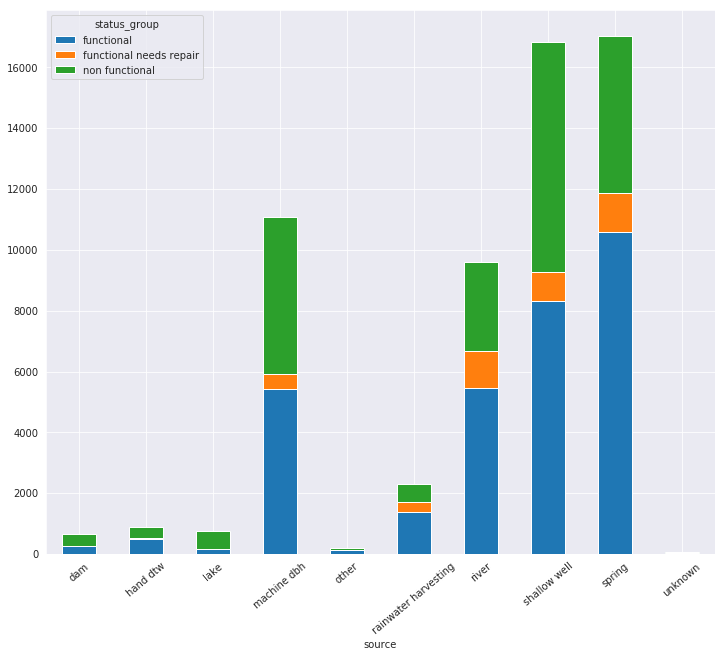

In [0]:
# Different sources affect the status?
plot = plot_df.groupby(['source', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

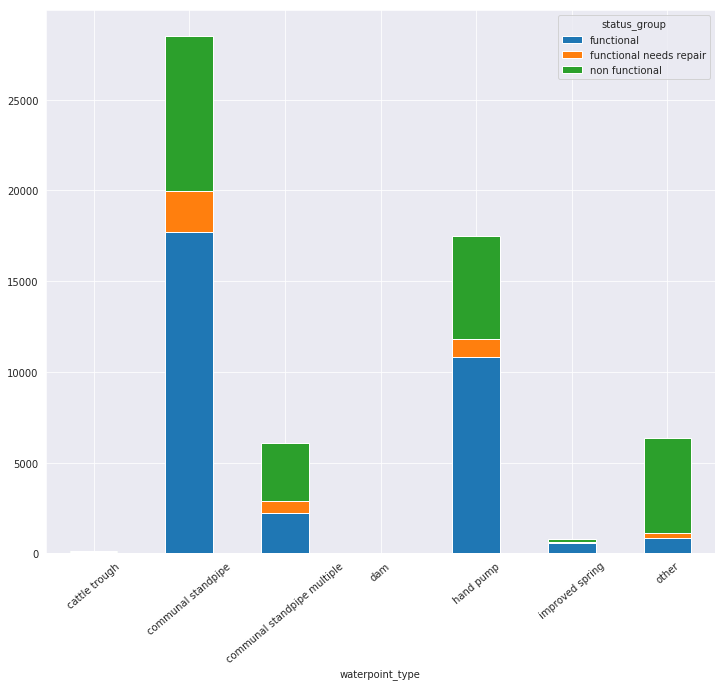

In [0]:
# Different waterpoints affect the status?
plot = plot_df.groupby(['waterpoint_type', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

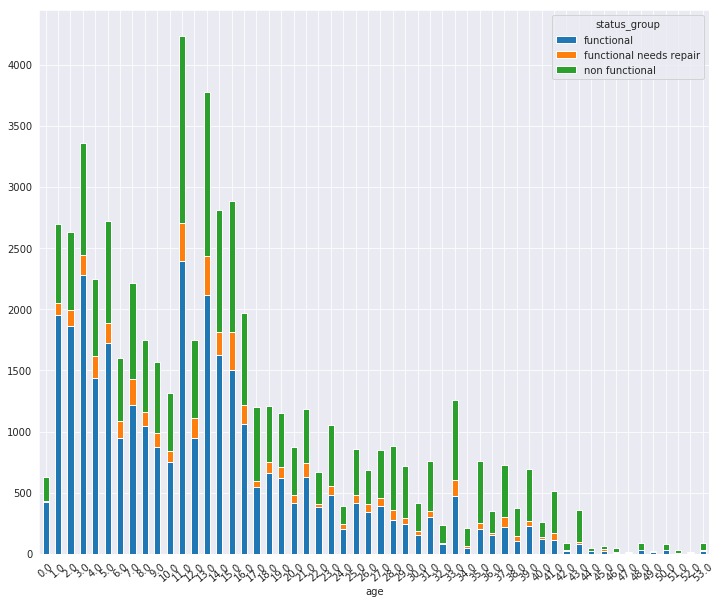

In [0]:
# Different ages affect the status?
plot = plot_df.groupby(['age', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

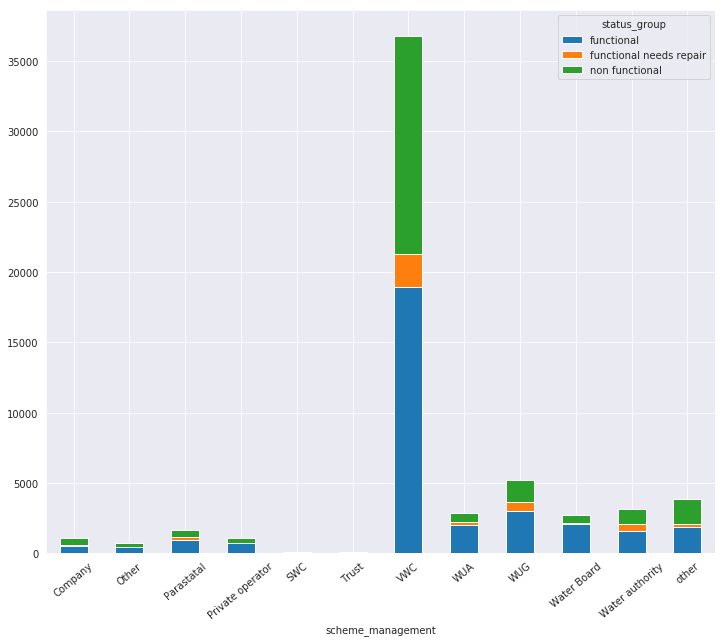

In [0]:
# Different scheme_management affect the status?
plot = plot_df.groupby(['scheme_management', 'status_group']) \
               .quantity \
               .count() \
               .unstack()

plot.plot(kind='bar', stacked=True, figsize=(12, 10), rot=40);

In [0]:
# plotting the density of the different status with respect to GPS coordinates

# Split the plot_df into three based on status group
func_df = plot_df.loc[plot_df.status_group == 'functional']
nfunc_df = plot_df.loc[plot_df.status_group == 'non functional']
rfunc_df = plot_df.loc[plot_df.status_group == 'functional needs repair']

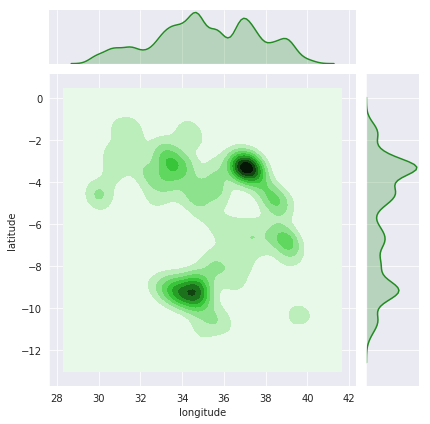

In [0]:
# Geographical distribution of functional pumps 
sns.jointplot(y=func_df['latitude'], x=func_df['longitude'], kind='kde', color='forestgreen')

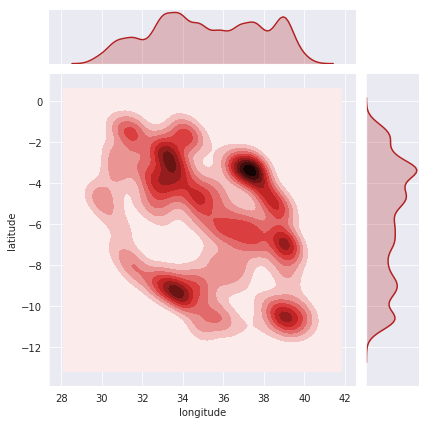

In [0]:
# Geographical distribution of non functional pumps
sns.jointplot(y=nfunc_df['latitude'], x=nfunc_df['longitude'], kind='kde', color='firebrick')

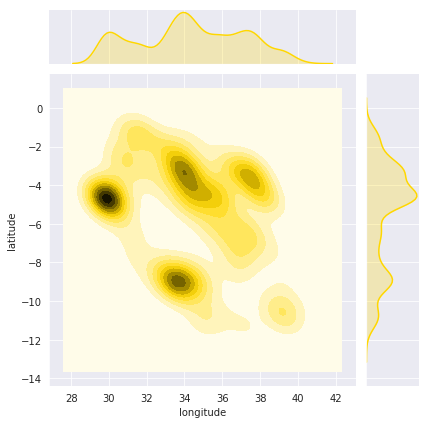

In [0]:
# Geographical distribution of functional/needs repair pumps
sns.jointplot(y=rfunc_df['latitude'], x=rfunc_df['longitude'], kind='kde', color='gold')

In [0]:
# There are clear differences on the distribution of pumps with a different status. 
# => The gps coordinates are likely to be an important feature in the models.

In [0]:
# Trying to visualize the gps height together with the gps coordinates for each status.

from mpl_toolkits.mplot3d import Axes3D

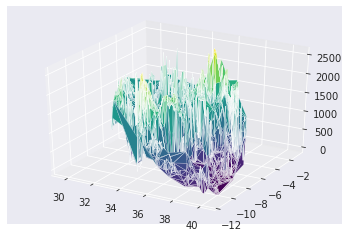

In [0]:
# GPS position and height of functional pumps
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(func_df['longitude'], func_df['latitude'], func_df['gps_height'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()

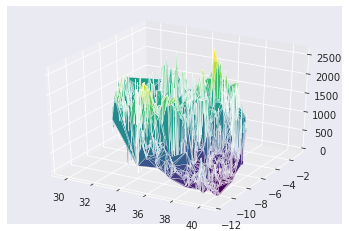

In [0]:
# GPS position and height of non functional pumps
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(nfunc_df['longitude'], nfunc_df['latitude'], nfunc_df['gps_height'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()

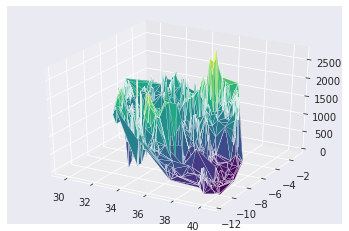

In [0]:
# GPS position and height of functional/needs repair pumps
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(rfunc_df['longitude'], rfunc_df['latitude'], rfunc_df['gps_height'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()

In [0]:
# Nice graphs but not very informative

## Preparation for modeling

### Factorization

In [0]:
# Drop the remaining useless columns
all_data = all_data.drop(['id', 'subvillage', 'lga', 'ward'], axis=1)

# List the categorical features
categorical = ['funder',
               'installer',
               'basin',
               'scheme_management',
               'extraction_type_class',
               'management',
               'management_group',
               'payment_type',
               'water_quality',
               'quantity',
               'source',
               'source_class',
               'waterpoint_type']

# And now factorize all the categorical features
for i in categorical:
    all_data[i] = pd.factorize(all_data[i])[0]

### Train-Test split and label factorization

In [0]:
# Splitting train and test
train = all_data[0:len(train_data)]
test = all_data[len(train_data):]

# Dropping the 'id' axis from the target
train_labels = train_labels.drop(['id'], axis=1)

# And factorizing the target
labels = pd.factorize(train_labels.status_group)[0]

## PCA and LDA for visualizing the dataset

In [0]:
# Dimensionality reduction with PCA + LDA to try visualize the dataset in 2/3 dimensions

In [0]:
# Normalizing features
from sklearn.preprocessing import Normalizer

# Defining the normalized
normalizer = Normalizer()

# Fitting normalizer to train set
normalizer.fit(train)
train_norm = normalizer.transform(train)

In [0]:
# Importing PCA library
from sklearn import decomposition
from sklearn import preprocessing

# 10 components PCA
pca = decomposition.PCA(n_components=10)

# Fit PCA to train data
pca.fit(train_norm)
train_pca = pca.transform(train_norm)

In [0]:
# Importing LDA library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Trying to visualize the data in 2 dimensions

# 2 components LDA
LDA = LinearDiscriminantAnalysis(n_components=2, solver='svd')

# Fit LDA to train data
LDA.fit(train_norm, labels)
train_LDA = LDA.transform(train_norm)

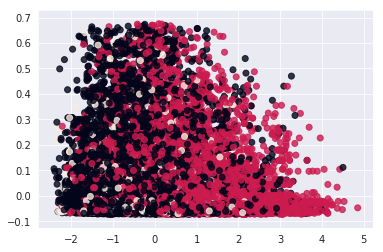

In [0]:
# Scatter plot colored by status group
plt.scatter(train_LDA[:,0], train_pca[:,1], 
            alpha = .8, c=labels);

In [0]:
# 3 components PCA
pca = decomposition.PCA(n_components=3)

# Fit PCA to train data
pca.fit(train_norm)
train_pca = pca.transform(train_norm)

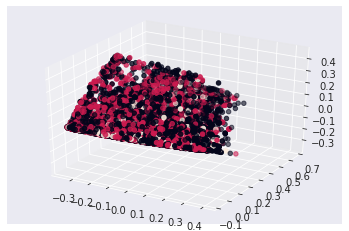

In [0]:
# 3D Scatter plot colored by status group
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(train_pca[:,0], train_pca[:,1], train_pca[:,2], c=labels)

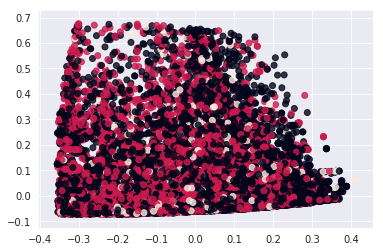

In [0]:
# 2D scatter plots colored by status group x-y axis
plt.scatter(train_pca[:,0], train_pca[:,1], 
            alpha = .8, c=labels);

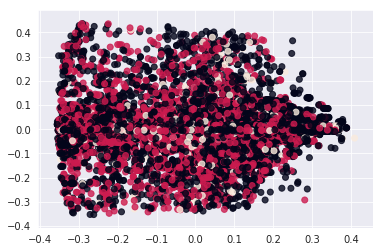

In [0]:
# 2D scatter plots colored by status group x-z axis
plt.scatter(train_pca[:,0], train_pca[:,2], 
            alpha = .8, c=labels);

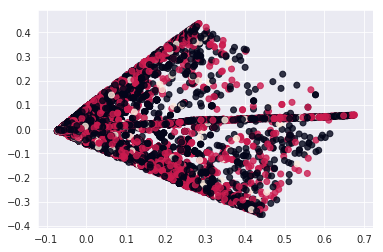

In [0]:
# 2D scatter plots colored by status group x-z axis
plt.scatter(train_pca[:,1], train_pca[:,2], 
            alpha = .8, c=labels);

In [0]:
# Nice try

## Baseline Models

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score 

### Train_Test Split for baseline models

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# split data into train and test sets
seed = 42
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=test_size, random_state=seed)

### Random Forest Baseline

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
# Define classifier
forest = RandomForestClassifier(n_estimators=300, random_state=42)

# Fit the model
forest.fit(X_train,y_train)

# make predictions for test data
y_pred = forest.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

Accuracy: 79.70%
Precision: 79.02%


In [0]:
# 3 fold cross validation
score = cross_val_score(forest, train, labels, scoring='accuracy', cv=3).mean()
print('3 fold cross-validation score:', score.round(4))

3 fold cross-validation score: 0.7977


In [0]:
# Confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2
0,9353,1029,337
1,1532,5782,144
2,703,234,488


In [0]:
# Variable importance
test_predictions = pd.DataFrame(y_pred)

variable_importance = pd.concat([pd.DataFrame(X_train.columns), 
                                        pd.DataFrame(forest.feature_importances_)], 
                                       axis = 1)

variable_importance.columns = ['variable', 'importance']
variable_importance.sort_values(by='importance', ascending=False)[:10]

,variable,importance
15,quantity,0.108369
4,latitude,0.108133
3,longitude,0.107873
1,gps_height,0.101359
21,population_log,0.067074
22,age,0.053423
9,construction_year,0.052879
18,waterpoint_type,0.051534
10,extraction_type_class,0.050852
0,funder,0.046441


### XGBoost Baseline

In [0]:
from xgboost import XGBClassifier

In [0]:
# Defining Classifier
xgb = XGBClassifier(max_depth=10, n_estimators=300, silent=False, booster='gbtree')

# Fit the model
xgb.fit(X_train, y_train)

# make predictions for test data
y_pred = xgb.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

Accuracy: 80.34%
Precision: 79.72%


In [0]:
# 3 fold cross validation
score = cross_val_score(xgb, train, labels, scoring='accuracy', cv=3).mean()
print('3 fold cross-validation score:', score.round(4))

3 fold cross-validation score: 0.8035


In [0]:
# Confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2
0,9525,915,279
1,1600,5751,107
2,742,210,473


In [0]:
# Variable importance
test_predictions = pd.DataFrame(y_pred)

variable_importance = pd.concat([pd.DataFrame(X_train.columns), 
                                pd.DataFrame(xgb.feature_importances_)], 
                                    axis = 1)

variable_importance.columns = ['variable', 'importance']
variable_importance.sort_values(by='importance', ascending=False)[:10]

,variable,importance
15,quantity,0.215666
10,extraction_type_class,0.094577
18,waterpoint_type,0.093691
6,region_code,0.047412
5,basin,0.043106
13,payment_type,0.042407
16,source,0.041454
22,age,0.036213
11,management,0.035547
7,public_meeting,0.032261


## KNN Baseline

In [0]:
from sklearn.neighbors import KNeighborsClassifier 

In [0]:
# split data into train and test test (using the same normalized dataset used for PCA and LDA)
seed = 42
test_size = 0.33
knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(train_norm, labels, 
                                                                    test_size=test_size, 
                                                                    random_state=seed)

In [0]:
# Define Classifier
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the model
knn.fit(knn_X_train, knn_y_train)

# make predictions for test data
knn_y_pred = knn.predict(knn_X_test)

# evaluate predictions
accuracy = accuracy_score(knn_y_test, knn_y_pred)
precision = precision_score(knn_y_test, knn_y_pred, average='weighted')

# Print the results
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

Accuracy: 67.04%
Precision: 65.92%


In [0]:
# 10 fold cross validation
score = cross_val_score(knn, train, labels, scoring='accuracy', cv=10).mean()
print('10 fold cross-validation score:', score.round(4))

10 fold cross-validation score: 0.6762


In [0]:
# Confusion matrix
pd.DataFrame(confusion_matrix(knn_y_test, knn_y_pred))

,0,1,2
0,8878,1699,142
1,3311,4045,102
2,875,332,218


### LDA

In [0]:
# split data into train and test sets (using the same normalized dataset used for PCA and LDA)
seed = 42
test_size = 0.33
LDA_X_train, LDA_X_test, LDA_y_train, LDA_y_test = train_test_split(train_norm, labels, 
                                                                    test_size=test_size, 
                                                                    random_state=seed)

In [0]:
# 2 components LDA
LDA = LinearDiscriminantAnalysis(n_components=2, solver='svd')

# Fit LDA to train data
LDA.fit(LDA_X_train, LDA_y_train)
LDA_X_train = LDA.transform(LDA_X_train)

# make predictions for test data
LDA_y_pred = LDA.predict(LDA_X_test)

# evaluate predictions
accuracy = accuracy_score(LDA_y_test, LDA_y_pred)
precision = precision_score(LDA_y_test, LDA_y_pred, average='weighted')

# Print the results
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

Accuracy: 63.97%
Precision: 61.64%


In [0]:
# 10 fold cross validation
score = cross_val_score(LDA, train, labels, scoring='accuracy', cv=10).mean()
print('10 fold cross-validation score:', score.round(4))

10 fold cross-validation score: 0.6408


In [0]:
# Confusion matrix
pd.DataFrame(confusion_matrix(LDA_y_test, LDA_y_pred))

,0,1,2
0,8755,1863,101
1,3678,3711,69
2,971,380,74


### KNN after LDA

In [0]:
# Fit LDA to train data
LDA.fit(train_norm, labels)
train_LDA = LDA.transform(train_norm)

In [0]:
# split data into train and test sets
seed = 42
test_size = 0.33
LDA_X_train, LDA_X_test, LDA_y_train, LDA_y_test = train_test_split(train_LDA, labels, 
                                                                    test_size=test_size, 
                                                                    random_state=seed)

In [0]:
# Define classifier
LDA_knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
LDA_knn.fit(LDA_X_train, LDA_y_train)

# make predictions for test data
LDA_y_pred = LDA_knn.predict(LDA_X_test)

# evaluate predictions
accuracy = accuracy_score(LDA_y_test, LDA_y_pred)
precision = precision_score(LDA_y_test, LDA_y_pred, average='weighted')

# Print the results
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

Accuracy: 65.62%
Precision: 63.96%


In [0]:
# 10 fold cross validation
score = cross_val_score(LDA_knn, train, labels, scoring='accuracy', cv=10).mean()
print('10 fold cross-validation score:', score.round(4))

10 fold cross-validation score: 0.6889


In [0]:
# Confusion matrix
pd.DataFrame(confusion_matrix(LDA_y_test, LDA_y_pred))

,0,1,2
0,8340,2181,198
1,3006,4343,109
2,873,373,179


## Hyperparameter Tuning

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

### Random Forest

In [0]:
# Defining the classifier
forest = RandomForestClassifier()

In [0]:
# Dfining the parameters distribution for random search

# First search
# Best parameters: {'n_estimators': 300, 'min_samples_split': 10, 'max_features': 'log2', 'max_depth': 30}
# Best score: 0.798

# Second search
# Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'max_features': 'log2', 'max_depth': 20}
# Best score: 0.7971

# Third search
# Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'max_features': 'log2', 'max_depth': 20}
# Best score: 0.797251

# Fourth search
# Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'max_features': 'log2', 'max_depth': 20}
# Best score: 0.797628

# Fifth search
# Best parameters: {'n_estimators': 320, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 22}
# Best score: 0.798332

# Sixth search
# Best parameters: {'n_estimators': 280, 'min_samples_split': 6, 'max_features': 'log2', 'max_depth': 22}
# Best score: 0.798357

param_dist = dict(n_estimators=[280, 300, 320],
                  max_features=['log2', 'sqrt'],
                  max_depth=[18, 20, 22],
                  min_samples_split=[3, 5, 6])

In [0]:
# Defining the random search
cv = RandomizedSearchCV(forest, param_distributions=param_dist, n_iter=10, cv=3)

# Fitting the search
cv.fit(X_train, y_train)

# Returning best set of parameter and best cross validated score (accuracy)
print("Best parameters:", cv.best_params_)
print("Best score:", cv.best_score_.round(6))

Best parameters: {'n_estimators': 280, 'min_samples_split': 6, 'max_features': 'sqrt', 'max_depth': 22}
Best score: 0.79803


In [0]:
# Define classifier
forest = RandomForestClassifier(n_estimators=320, 
                                min_samples_split=5, 
                                max_features='log2', 
                                max_depth=22, 
                                random_state=42)

# Fit the model
forest.fit(train,labels)


# --- Making a submission to check the score => 0.8201

# Predictions
predictions = pd.DataFrame(forest.predict(test))

# Recoding
predictions.loc[predictions[0] == 0] = 'functional'
predictions.loc[predictions[0] == 1] = 'non functional'
predictions.loc[predictions[0] == 2] = 'functional needs repair'

# Concatenating with id
submission = pd.concat([test_data['id'], predictions], axis=1)
submission.columns = ('id', 'status_group')

# Saving file
submission.to_csv('forest_hyped_submission.csv', header=True, index=False)

### XGBoost

In [0]:
# defining the dlassifier
xgb = XGBClassifier()

In [0]:
# First Search
# Best parameters: {'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.3, 'booster': 'gbtree'}
# Best score: 0.795166

# Second Search
param_dist = dict(n_estimators=[50, 100, 500, 1000],
                  max_depth=[10, 25, 50],
                  learning_rate=[0.1, 0.3, 0.5, 0.7],
                  booster = ['gbtree', 'dart'])
    
# Third Search
param_dist = dict(n_estimators=[50, 250, 500, 1000],
                  max_depth=[10, 20, 40, 50],
                  learning_rate=[0.1, 0.2, 0.3],
                  booster = ['gbtree'])

In [0]:
# Defining the random search --- MODEL Not Ran at the last compilation before submission
# cv = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=10, cv=3)

# Fitting the search
# cv.fit(X_train, y_train)

# Returning best set of parameter and best cross validated score (accuracy)
# print("Best parameters:", cv.best_params_)
# print("Best score:", cv.best_score_.round(6))

In [0]:
# Define classifier
xgb = XGBClassifier(n_estimators=50, 
                    learning_rate=0.3, 
                    booster='gbtree', 
                    max_depth=10)

# Fit the model
xgb.fit(train,labels)


# Making a submission to check the score => 0.8160

# Predictions
predictions = pd.DataFrame(xgb.predict(test))

# Recoding
predictions.loc[predictions[0] == 0] = 'functional'
predictions.loc[predictions[0] == 1] = 'non functional'
predictions.loc[predictions[0] == 2] = 'functional needs repair'

# Concatenating with id
submission = pd.concat([test_data['id'], predictions], axis=1)
submission.columns = ('id', 'status_group')

# Saving file
submission.to_csv('xgb_hyped_submission.csv', header=True, index=False)

## Model Stacking

In [0]:
from mlxtend.classifier import StackingClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
# model 1: random forest with tuned parameters 
clf1 = RandomForestClassifier(n_estimators=320, 
                                min_samples_split=5, 
                                max_features='sqrt', 
                                max_depth=22, 
                                random_state=42)

# model 2: xgboost with tuned parameters
clf2 = XGBClassifier(max_depth=10, 
                     n_estimators=300, 
                     silent=False, 
                     booster='gbtree')

# meta-classifier: random forest
mcl = RandomForestClassifier(n_estimators=300, 
                                min_samples_split=5, 
                                max_features='sqrt', 
                                max_depth=50, 
                                random_state=42)

# defining stacker
sclf = StackingClassifier(classifiers=[clf1, clf2], 
                          meta_classifier=mcl)

In [0]:
# Fitting the model
sclf.fit(X_train, y_train)

StackingClassifier(average_probas=False,
                   classifiers=[RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=22,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=5,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=320,
                                                 

In [0]:
# make predictions for test data
y_pred = sclf.predict(X_test)

In [0]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

Accuracy: 80.30%
Precision: 79.60%


In [0]:
# 3 fold cross validation --- MODEL Not Ran at the last compilation before submission
# score = cross_val_score(sclf, train, labels, scoring='accuracy', cv=3).mean()
# print('10 fold cross-validation score:', score.round(4))

In [0]:
# Confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2
0,9308,1100,311
1,1414,5929,115
2,682,240,503


In [0]:
# Variable importance
test_predictions = pd.DataFrame(y_pred)

variable_importance = pd.concat([pd.DataFrame(X_train.columns), 
                                        pd.DataFrame(forest.feature_importances_)], 
                                       axis = 1)

variable_importance.columns = ['variable', 'importance']
variable_importance.sort_values(by='importance', ascending=False)[:10]

,variable,importance
15,quantity,0.131091
3,longitude,0.092970
4,latitude,0.090682
1,gps_height,0.079819
10,extraction_type_class,0.063156
18,waterpoint_type,0.062823
21,population_log,0.056032
22,age,0.054244
9,construction_year,0.053571
0,funder,0.044989


In [0]:
# Fit the model
sclf.fit(train,labels)


# Making a submission to check the score => 0.8178

# Predictions
predictions = pd.DataFrame(sclf.predict(test))

# Recoding
predictions.loc[predictions[0] == 0] = 'functional'
predictions.loc[predictions[0] == 1] = 'non functional'
predictions.loc[predictions[0] == 2] = 'functional needs repair'

# Concatenating with id
submission = pd.concat([test_data['id'], predictions], axis=1)
submission.columns = ('id', 'status_group')

# Saving file
submission.to_csv('forest_xgb_stacked_submission.csv', header=True, index=False)

## Specialized random forests

In [0]:
labels = pd.DataFrame(labels)

In [0]:
labels_f = labels.copy(True)
labels_nf = labels.copy(True)
labels_nr = labels.copy(True)

In [0]:
# Recoding non functional and needs repair to one single factor
labels_f.loc[labels_f[0] == 2] = 1

# Recoding functional and needs repair to one single factor
labels_nf.loc[labels_nf[0] == 0] = 2 # Assign 2 to functional
labels_nf.loc[labels_nf[0] == 1] = 0 # Assigning 0 to non functional
labels_nf.loc[labels_nf[0] == 2] = 1 # Assigning 1 to functional and needs repair

# Recoding functional and non functional to one single factor
labels_nr.loc[labels_nr[0] == 0] = 1 # Assign 1 to functional
labels_nr.loc[labels_nr[0] == 2] = 0 # Assign 0 to needs repair

### Forest For Functional Class

In [0]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(train, labels_f, 
                                                    test_size=test_size, 
                                                    random_state=seed)

In [0]:
# Defining the classifier
forest = RandomForestClassifier()

In [0]:
# First Search
# Best parameters: {'n_jobs': -1, 'n_estimators': 1000, 'min_samples_split': 10, 'max_features': 'log2', 'max_depth': 60, 'class_weight': {0: 1, 1: 1}}
# Best score: 0.813232

param_dist = dict(n_estimators=[100, 300, 500, 1000],
                  max_features=['log2', 'sqrt'],
                  max_depth=[10, 20, 40, 60, 100, 200],
                  min_samples_split=[2, 5, 8, 10, 50],
                  class_weight=[{0:1,1:1},{0:2,1:1},{0:3,1:1}])

In [0]:
# Second search
# Best parameters: {'n_jobs': -1, 'n_estimators': 300, 'min_samples_split': 8, 'max_features': 'log2', 'max_depth': 80, 'class_weight': {0: 1, 1: 1}}
# Best score: 0.814262
param_dist = dict(n_estimators=[300, 500, 1000],
                  max_features=['log2', 'sqrt'],
                  max_depth=[40, 60, 80],
                  min_samples_split=[8, 10, 20],
                  class_weight=[{0:1,1:1},{0:2,1:1},{0:3,1:1}],
                  n_jobs=[-1])

In [0]:
# Third search
# Best parameters: {'n_jobs': -1, 'n_estimators': 300, 'min_samples_split': 7, 'max_features': 'sqrt', 'max_depth': 90}
# Best score: 0.813734
param_dist = dict(n_estimators=[200, 300, 400],
                  max_features=['log2', 'sqrt'],
                  max_depth=[70, 80, 90],
                  min_samples_split=[7, 8, 9],
                  n_jobs=[-1])

In [0]:
# Fourth search
# Best parameters: {'n_jobs': -1, 'n_estimators': 300, 'min_samples_split': 8, 'max_features': 'log2', 'max_depth': 95}
# Best score: 0.813885
param_dist = dict(n_estimators=[250, 300, 350],
                  max_features=['log2', 'sqrt'],
                  max_depth=[85, 90, 95],
                  min_samples_split=[7, 8, 9],
                  n_jobs=[-1])

In [0]:
# Defining the random search
cv = RandomizedSearchCV(forest, param_distributions=param_dist, n_iter=10, cv=3)

# Fitting the search
# cv.fit(X_train, y_train) --- search not fitted in last compilation before submission

# Returning best set of parameter and best cross validated score (accuracy)
# print("Best parameters:", cv.best_params_)
# print("Best score:", cv.best_score_.round(6))

In [0]:
# Define classifier with parameters from grid search
forest = RandomForestClassifier(n_estimators=300, 
                                min_samples_split=8,
                                max_features='sqrt',
                                max_depth=95,
                                random_state=42)

# Fit the model
forest.fit(X_train,y_train)

# make predictions for test data
y_pred = forest.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

Accuracy: 82.04%
Precision: 82.07%


In [0]:
# 3 fold cross validation --- cv not ran during last compilation before submission
# score = cross_val_score(forest, train, labels, scoring='accuracy', cv=3).mean()
# print('3 fold cross-validation score:', score.round(4))

In [0]:
# Confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,9287,1432
1,2089,6794


In [0]:
# Variable importance
test_predictions = pd.DataFrame(y_pred)

variable_importance = pd.concat([pd.DataFrame(X_train.columns), 
                                        pd.DataFrame(forest.feature_importances_)], 
                                       axis = 1)

variable_importance.columns = ['variable', 'importance']
variable_importance.sort_values(by='importance', ascending=False)[:10]

,variable,importance
15,quantity,0.128940
3,longitude,0.091612
4,latitude,0.090370
1,gps_height,0.079943
18,waterpoint_type,0.065094
10,extraction_type_class,0.059152
22,age,0.059022
9,construction_year,0.056635
21,population_log,0.054737
0,funder,0.046926


### Forest For Non Functional Class

In [0]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(train, labels_nf, 
                                                    test_size=test_size, 
                                                    random_state=seed)

In [0]:
# Defining the classifier
forest = RandomForestClassifier()

In [0]:
# First Search
# Best parameters: {'n_jobs': -1, 'n_estimators': 1000, 'min_samples_split': 5, 'max_features': 'log2', 'max_depth': 60, 'class_weight': {0: 1, 1: 1}}
# Best score: 0.852631
param_dist = dict(n_estimators=[100, 300, 500, 1000],
                  max_features=['log2', 'sqrt'],
                  max_depth=[10, 20, 40, 60, 100, 200],
                  min_samples_split=[2, 5, 8, 10, 50],
                  class_weight=[{0:1,1:1},{0:2,1:1},{0:3,1:1}])



In [0]:
# Second Search
# Best parameters: {'n_jobs': -1, 'n_estimators': 300, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 40, 'class_weight': {0: 1, 1: 1}}
# Best score: 0.853158
param_dist = dict(n_estimators=[300, 500, 1000],
                  max_features=['log2', 'sqrt'],
                  max_depth=[40, 60, 80],
                  min_samples_split=[3, 5, 7],
                  class_weight=[{0:1,1:1},{0:2,1:1},{0:3,1:1}],
                  n_jobs=[-1])

In [0]:
# Third search
# Best parameters: {'n_jobs': -1, 'n_estimators': 300, 'min_samples_split': 5, 'max_features': 'log2', 'max_depth': 60}
# Best score: 0.852882
param_dist = dict(n_estimators=[200, 300, 400],
                  max_features=['log2', 'sqrt'],
                  max_depth=[20, 40, 60],
                  min_samples_split=[4, 5, 6],
                  n_jobs=[-1])

In [0]:
# Fourth search
param_dist = dict(n_estimators=[250, 300, 350],
                  max_features=['log2', 'sqrt'],
                  max_depth=[50, 60, 70],
                  min_samples_split=[4, 5, 6],
                  n_jobs=[-1])

In [0]:
# Defining the random search
cv = RandomizedSearchCV(forest, param_distributions=param_dist, n_iter=10, cv=3)

# Fitting the search
# cv.fit(X_train, y_train) --- search not fitted during last compilation before submission

# Returning best set of parameter and best cross validated score (accuracy)
# print("Best parameters:", cv.best_params_)
# print("Best score:", cv.best_score_.round(6))

In [0]:
# Define classifier with parameters from grid search
forest = RandomForestClassifier(n_estimators=300, 
                                min_samples_split=5,
                                max_features='log2',
                                max_depth=50,
                                random_state=42)

# Fit the model
forest.fit(X_train,y_train)

# make predictions for test data
y_pred = forest.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

Accuracy: 85.71%
Precision: 85.68%


In [0]:
# 3 fold cross validation --- cv not ran during last compilation before submission
# score = cross_val_score(forest, train, labels, scoring='accuracy', cv=3).mean()
# print('3 fold cross-validation score:', score.round(4))

In [0]:
# Confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,5629,1829
1,973,11171


In [0]:
# Variable importance
test_predictions = pd.DataFrame(y_pred)

variable_importance = pd.concat([pd.DataFrame(X_train.columns), 
                                        pd.DataFrame(forest.feature_importances_)], 
                                       axis = 1)

variable_importance.columns = ['variable', 'importance']
variable_importance.sort_values(by='importance', ascending=False)[:10]

,variable,importance
15,quantity,0.145409
4,latitude,0.089879
3,longitude,0.087776
1,gps_height,0.076970
10,extraction_type_class,0.068422
18,waterpoint_type,0.062615
21,population_log,0.054577
22,age,0.054276
9,construction_year,0.052640
0,funder,0.042892


### Forest for functional needs repair

In [0]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(train, labels_nr, 
                                                    test_size=test_size, 
                                                    random_state=seed)

In [0]:
# Defining the classifier
forest = RandomForestClassifier()

In [0]:
# First Search
# Best parameters: {'n_jobs': -1, 'n_estimators': 300, 'min_samples_split': 8, 'max_features': 'log2', 'max_depth': 60, 'class_weight': {0: 1, 1: 1}}
# Best score: 0.93462
param_dist = dict(n_estimators=[100, 300, 500, 1000],
                  max_features=['log2', 'sqrt'],
                  max_depth=[10, 20, 40, 60, 100, 200],
                  min_samples_split=[2, 5, 8, 10, 50],
                  class_weight=[{0:1,1:1},{0:2,1:1},{0:3,1:1}])

In [0]:
# Second search
# Best parameters: {'n_estimators': 100, 'min_samples_split': 8, 'max_features': 'log2', 'max_depth': 60, 'class_weight': {0: 1, 1: 1}}
# Best score: 0.935047
param_dist = dict(n_estimators=[100, 300, 500],
                  max_features=['log2', 'sqrt'],
                  max_depth=[40, 60, 80],
                  min_samples_split=[6, 8, 10],
                  class_weight=[{0:1,1:1},{0:2,1:1},{0:3,1:1}])

In [0]:
# Third search
# Best parameters: {'n_jobs': -1, 'n_estimators': 50, 'min_samples_split': 9, 'max_features': 'sqrt', 'max_depth': 60}
# Best score: 0.934846
param_dist = dict(n_estimators=[50, 100, 200],
                  max_features=['log2', 'sqrt'],
                  max_depth=[40, 60, 80],
                  min_samples_split=[7, 8, 9],
                  n_jobs=[-1])

In [0]:
# Fourth search
# Best parameters: {'n_jobs': -1, 'n_estimators': 50, 'min_samples_split': 8, 'max_features': 'log2', 'max_depth': 70}
# Best score: 0.935298
param_dist = dict(n_estimators=[50, 60, 70],
                  max_features=['log2', 'sqrt'],
                  max_depth=[50, 60, 70],
                  min_samples_split=[8, 9, 10],
                  n_jobs=[-1])

In [0]:
# Defining the random search
cv = RandomizedSearchCV(forest, param_distributions=param_dist, n_iter=10, cv=3)

# Fitting the search
# cv.fit(X_train, y_train) --- search not fitted during last compilation before submission

# Returning best set of parameter and best cross validated score (accuracy)
# print("Best parameters:", cv.best_params_)
# print("Best score:", cv.best_score_.round(6))

In [0]:
# Define classifier with parameters from grid search
forest = RandomForestClassifier(n_estimators=50, 
                                min_samples_split=8,
                                max_features='sqrt',
                                max_depth=70,
                                random_state=42)

# Fit the model
forest.fit(X_train,y_train)

# make predictions for test data
y_pred = forest.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

Accuracy: 93.58%
Precision: 92.28%


In [0]:
# 3 fold cross validation --- cv not ran during last compilation before submission
# score = cross_val_score(forest, train, labels, scoring='accuracy', cv=3).mean()
# print('3 fold cross-validation score:', score.round(4))

In [0]:
# Confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,353,1072
1,186,17991


In [0]:
# Variable importance
test_predictions = pd.DataFrame(y_pred)

variable_importance = pd.concat([pd.DataFrame(X_train.columns), 
                                        pd.DataFrame(forest.feature_importances_)], 
                                       axis = 1)

variable_importance.columns = ['variable', 'importance']
variable_importance.sort_values(by='importance', ascending=False)[:10]

,variable,importance
3,longitude,0.141931
4,latitude,0.125299
1,gps_height,0.113499
21,population_log,0.081774
0,funder,0.057733
22,age,0.054318
9,construction_year,0.054173
2,installer,0.045333
13,payment_type,0.042394
15,quantity,0.033040


### Stacking the forests

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(train, labels, 
                                                    test_size=test_size, 
                                                    random_state=seed)

In [0]:
# forest for functional
forest_functional = RandomForestClassifier(n_estimators=300, 
                                min_samples_split=8,
                                max_features='sqrt',
                                max_depth=95,
                                random_state=42)

# forest for non functional
forest_nonfunctional = RandomForestClassifier(n_estimators=300, 
                                min_samples_split=5,
                                max_features='log2',
                                max_depth=50,
                                random_state=42)

# forest for needs repair
forest_needsrepair = RandomForestClassifier(n_estimators=50, 
                                min_samples_split=8,
                                max_features='sqrt',
                                max_depth=70,
                                random_state=42)

# meta-classifier: logistic regression
stacker = LogisticRegression(penalty='l2', 
                             solver='newton-cg', 
                             multi_class='multinomial')

# defining the stacker
sclf = StackingClassifier(classifiers=[forest_functional, forest_nonfunctional, forest_needsrepair], 
                          meta_classifier=stacker)

In [0]:
# fitting the model
sclf.fit(X_train, y_train)

StackingClassifier(average_probas=False,
                   classifiers=[RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=95,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=8,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=300,
                                                 

In [0]:
# make predictions for test data
y_pred = sclf.predict(X_test)

In [0]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

Accuracy: 80.39%
Precision: 79.70%


In [0]:
# 3 fold cross validation --- cv not ran during last compilation before submission
# score = cross_val_score(sclf, train, labels, scoring='accuracy', cv=3).mean()
# print('3 fold cross-validation score:', score.round(4))

In [0]:
# Confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2
0,9540,931,248
1,1586,5765,107
2,744,228,453


In [0]:
# Variable importance
test_predictions = pd.DataFrame(y_pred)

variable_importance = pd.concat([pd.DataFrame(X_train.columns), 
                                        pd.DataFrame(forest.feature_importances_)], 
                                       axis = 1)

variable_importance.columns = ['variable', 'importance']
variable_importance.sort_values(by='importance', ascending=False)[:10]

,variable,importance
3,longitude,0.141931
4,latitude,0.125299
1,gps_height,0.113499
21,population_log,0.081774
0,funder,0.057733
22,age,0.054318
9,construction_year,0.054173
2,installer,0.045333
13,payment_type,0.042394
15,quantity,0.033040


In [0]:
# Fit the model
sclf.fit(train,labels)


# Making a submission to check the score => 0.8180

# Predictions
predictions = pd.DataFrame(sclf.predict(test))

# Recoding
predictions.loc[predictions[0] == 0] = 'functional'
predictions.loc[predictions[0] == 1] = 'non functional'
predictions.loc[predictions[0] == 2] = 'functional needs repair'

# Concatenating with id
submission = pd.concat([test_data['id'], predictions], axis=1)
submission.columns = ('id', 'status_group')

# Saving file
submission.to_csv('3forest_stacked_submission2.csv', header=True, index=False)

In [0]:
submission.shape

(14358, 2)

In [0]:
from google.colab import files
files.download('3forest_stacked_submission2.csv') 